In [10]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

from scipy import stats
from scipy.stats import norm


In [11]:
# Read the data file
df = pd.read_csv("Advertising_Adj.csv")

# Get the predictor and response variables
x = df.tv.values
y = df.sales.values

In [12]:
df.head()

,tv,sales
0,230.1,465.26
1,44.5,218.95
2,17.2,195.79
3,151.5,389.47
4,180.8,271.58


In [13]:
model = LinearRegression()

model.fit(df[['tv']], df['sales'])

LinearRegression()

In [14]:
model.coef_, model.intercept_

(array([1.00077387]), 148.0542586883501)

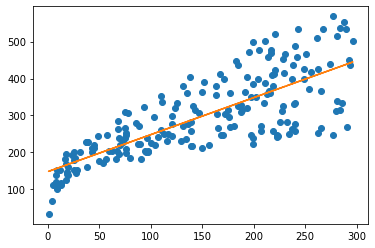

In [15]:
plt.plot(x,y,'o')
plt.plot(x,model.predict(df[['tv']]))

In [16]:
# List to store the accepted beta values in a list 
beta0_list = []
beta1_list = []

In [17]:
# Initial beta values
beta0=np.random.normal(loc=1,scale=1)
beta1=np.random.normal(loc=100,scale=1)

In [18]:
# Function to get the prior given the beta0 and beta1 values
def get_prior(beta0,beta1):
  prior_b0 = np.log(norm.pdf(beta0,1, 1))
  prior_b1 = np.log(norm.pdf(beta1,100,50))
  prior = np.sum(prior_b0+prior_b1)
  
  return prior

In [19]:
# Compute the likelihood for the initial beta values
likelihood = np.sum([-1*np.log(((y[j] - ((beta0*x[j]) + beta1))**2)) for j in range(len(x))])

# Get the prior of the intial beta values
prior = get_prior(beta0,beta1)

# Compute the posterior of the initial beta values
posterior = likelihood + prior


In [20]:
# Save the initial posterior value as prev_posterior for comparision later
prev_posterior = posterior
# Append the initial beta values to the list
beta0_list.append(beta0)
beta1_list.append(beta1)

In [21]:
# Number of sampling epochs
epochs = 250000

for i in range(epochs):

  # Get the new proposed beta values
  beta0 = np.random.normal(loc=beta0_list[-1],scale=0.5)
  beta1 = np.random.normal(loc=beta1_list[-1],scale=0.1)

  # Get the prior values for the proposed beta values
  prior = get_prior(beta0,beta1)


  # Compute P(data|w) i.e. the log-likelihood for all the data points
  likelihood = np.sum([-1*np.log(((y[j] - ((beta0*x[j]) + beta1))**2)) for j in range(len(x))])

  # To compute the posterior given the likelihood and prior
  posterior = likelihood + prior

  # Just the exponential of the ratio (Not the probability)
  prob = np.exp(posterior - prev_posterior)

  # If the prob is greater than 1 then the new proabability is larger than the old probability
  # Accept the values in this case
  if prob>1:

    # Append the beta0 and beta1 list values
    beta0_list.append(beta0)
    beta1_list.append(beta1)

    # Save the accepted posterior as the previous posterior
    prev_posterior = posterior

  else:
    coin = np.random.uniform(0, 1)

    # Accept the values in this case
    if coin>0.9:
      beta0_list.append(beta0)
      beta1_list.append(beta1)
      prev_posterior = posterior



In [22]:
# The number of data points to consider after the beta list has been populated
# The initial values of the lists will be random and hence can be removed
burn_rate = int(len(beta0_list)*0.3)

(array([2.8000e+01, 3.2900e+02, 2.0450e+03, 9.2480e+03, 2.7419e+04,
        5.3360e+03, 9.5900e+02, 1.4400e+02, 2.4000e+01, 2.0000e+00]),
 array([-1.35566822, -0.75083366, -0.1459991 ,  0.45883546,  1.06367001,
         1.66850457,  2.27333913,  2.87817369,  3.48300825,  4.08784281,
         4.69267736]),
 <a list of 10 Patch objects>)

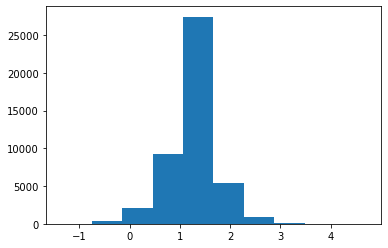

In [24]:
plt.hist(beta0_list[:-burn_rate])

(array([ 1818.,  4537., 11988., 11728.,  2941.,  2155.,  4377.,  3180.,
         1909.,   901.]),
 array([ 97.56535335, 100.36432869, 103.16330403, 105.96227937,
        108.76125471, 111.56023005, 114.3592054 , 117.15818074,
        119.95715608, 122.75613142, 125.55510676]),
 <a list of 10 Patch objects>)

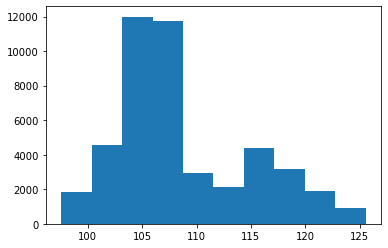

In [25]:
plt.hist(beta1_list[:-burn_rate])

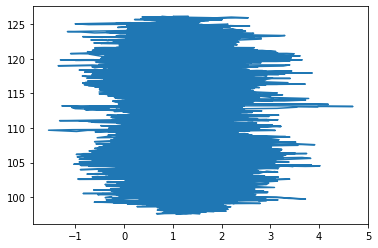

In [26]:
plt.plot(beta0_list,beta1_list)